# Natural Language Processing

In this Notebook we will be discussing, how to process text tobe able to using in NLP models and will be making some NLP models.

## .csv VS .tsv

* Most of the times in ML we are working with .csv(Comma Seperated Values) files. So for most of the ML task these type of files are okay. But when it comes to NLP it is not good to used .csv files, because we may have instance like where the Text value might have ',' in them. This will mess up extracting the data.

* So when we prepare our datasets it is always good to use .tsv(Tab Seperated Values) files. Because it is highly unlikely we will have tabs inside normal text like reviews, comments etc.

## Problem Statement

> In this notebook we will be looking at already labeld set of reviews and try to create a NLP model that can identify a review whether it is negative or positive

## Workflow...

1. Import the text data
2. Clean the data
    * Make all letteres lowercase
    * Get rid of special characters
    * Get rid of any numbers unless they have some significance
    * Get rid of words like 'The', 'A', 'An', 'in', 'is', 'am' and 'are' etc. (Because these words does not help to identify any thing)
    * Apply stemming (Only take the root word of words) ex: Loved, Loving, Loves -> Love
3. Create a Bag of words model

In [1]:
# Lets import the modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# setting a global random seed
np.random.seed(42)

In [2]:
# importing the .tsv file

# we can still use the read_csv() method we have to set some additional parameters
data = pd.read_csv('data/Natural Language Processing/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [3]:
# Cleaning Text Data

review ='Wow... Loved this place.'

# We wil performe several cleaning process to demeonstrate and use them on the data set within a loop

# Import the Python RegEx Module
import re

# get rid of everything except alphabetical letters and replace them with spaces for avoid making nonsence words
review = re.sub('[^a-zA-Z]',' ', review)

review

'Wow    Loved this place '

In [4]:
# Turn everything into lowercase
review = review.lower()
review

'wow    loved this place '

In [5]:
# We have to install NLTK
#!pip install nltk
#!python -m nltk.downloader all

In [6]:
# Get rid of words like 'the', 'that', 'is am are' etc. that does not help in identifying process
import nltk
from nltk.corpus import stopwords # This module contain list of garbage words
from nltk.stem import PorterStemmer # This is used for stemming the words

In [7]:
# Lets get rid of the stop words in the review
review = review.split() # this will return a list of words
review = [word for word in review if not word in stopwords.words('english')]
review

['wow', 'loved', 'place']

In [8]:
# lets stem all the words

stemmer = PorterStemmer() # Create a stemmer object

review = [stemmer.stem(word) for word in review]
review

['wow', 'love', 'place']

In [9]:
# we can do stemming and getting rid of garbage words in one line as well

#review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]

In [10]:
# now we have to join the words in the list and create a string as the last step
review = ' '.join(review)
review

'wow love place'

In [26]:
# Now lets perform this to every value in our data set one by one
import nltk
from nltk.corpus import stopwords # This module contain list of garbage words
from nltk.stem import PorterStemmer # This is used for stemming the words

stemmer = PorterStemmer()
# we have to get a deep copy other wise if something goes south we have to restart the kernal
# reviews = data['Review'].values pass a reference
reviews = data.iloc[:,0].copy(deep=True)
type(reviews)

pandas.core.series.Series

In [27]:
# go through each review and change them
for i in range(len(reviews)):
    # turn to lowercase
    reviews[i] = reviews[i].lower()
    
    # Only keep letters
    reviews[i] = re.sub('[^a-z]',' ',reviews[i])
    
    
    # Get rid of stop words and do stemming
    reviews[i] = reviews[i].split() # this will return a list of words
    reviews[i] = [stemmer.stem(word) for word in reviews[i] if not word in stopwords.words('english')]
    
    # Now we have to join the words
    reviews[i] = ' '.join(reviews[i])

In [36]:
# Now review is ready
reviews[:5]
# Those dots are not special character, its just to indicate string is long

0                                       wow love place
1                                           crust good
2                                   tasti textur nasti
3    stop late may bank holiday rick steve recommen...
4                              select menu great price
Name: Review, dtype: object

In [21]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [37]:
#now we can update reviews
type(reviews)

pandas.core.series.Series

In [38]:
data['Review'] = reviews

In [39]:
data.head()
# Noooice...!

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


## Bag of words 

* So what is this this is actually kind of a dummy variable matrix.
* What's that supposed to mean? It means we will create a matrix containing a column for each word in our  reviews list
* And if the word is in our review, column value will be 1 else 0
* Thats why I said its kind of like dummy variables (one hot encoder output) for categorical variables
* after that we can find the patterns using classification, its just simple as that

In [52]:
# Create a bag of words model

from sklearn.feature_extraction.text import CountVectorizer

# we have to set max features, because sometimes there maybe words that will not appear in the reviews again ex: 'wow'
# So by setting max features CountVectorizer will only keep most important features
transformer = CountVectorizer(max_features=1500)
X = transformer.fit_transform(reviews).toarray()

In [56]:
# lets look at X
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
# Now we can use this in a classification problem

y = data['Liked']

* lets create a machine learning model, We can use any classification model, But most commonly used ones for NLP are
    * Naive Bayes Model
    * Decision Trees Model
    * Random Forrest Model

We will use Random Forrest model.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into train test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# No need of feature scalling

model = RandomForestClassifier(n_estimators=550,)
model.fit(X=X_train,y=y_train)

# Getting a prediction
y_pred = model.predict(X_test)

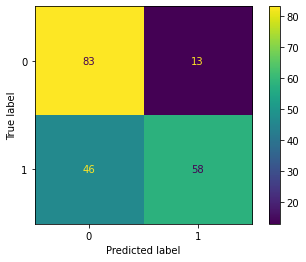

In [74]:
# lets get a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
disp =ConfusionMatrixDisplay(cm)
disp.plot();